In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
%matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')

import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

from public_tests3 import * 

from autils1 import *
from lab_utils_softmax import plt_softmax
np.set_printoptions(precision=2)


2024-03-25 16:21:53.586841: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-25 16:21:54.952643: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
#load data
def load_datas():
    X = np.load("X0-9.npy")
    y = np.load("y0-9.npy")
    return X, y

X,y=load_datas()

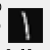

In [3]:
display_digit(X[700])

In [4]:
# # view variables
# print ('The first element of y is: ', y[0,0])
# print ('The last element of y is: ', y[-1,0])
# #print(f"the first element of x is: {X[0]}")
# print(y.shape) 
# print(X.shape)


print(X.shape)
print(X[4999])

(5000, 400)
[ 0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  1.61e-18  1.55e-04 -2.88e-03 -7.61e-03
 -7.44e-03 -2.96e-03  1.93e-04  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00
  5.67e-06  9.09e-05 -6.43e-04 -1.84e-02 -1.00e-02  2.80e-02  2.68e-02
 -9.23e-03 -3.55e-02 -1.36e-02  9.63e-05  5.23e-05  0.00e+00  0.00e+00
  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  0.00e+00  1.49e-04
 -2.71e-03 -2.79e-02  2.38e-01  6.27e-01  7.94e-01  7.87e-01  6.41e-01
  5.42e-01  1.78e-01 -2.57e-02 -3.04e-04  1.60e-04  0.00e+00  0.0

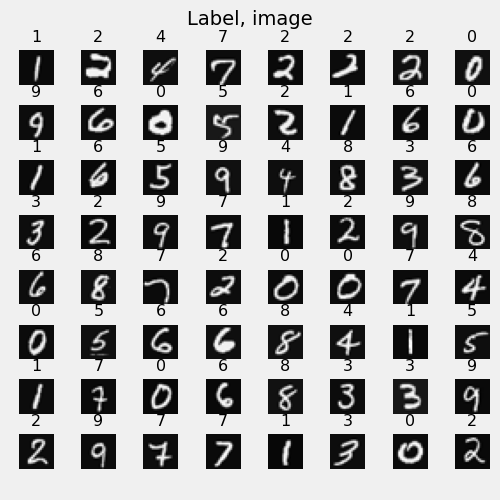

In [5]:
# visualize data
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# You do not need to modify anything in this cell

m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]

#fig.tight_layout(pad=0.5)
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

<a name="4.3"></a>
### 4.3 Model representation

The neural network you will use in this assignment is shown in the figure below. 
- This has two dense layers with ReLU activations followed by an output layer with a linear activation. 
    - Recall that our inputs are pixel values of digit images.
    - Since the images are of size $20\times20$, this gives us $400$ inputs  


- The parameters have dimensions that are sized for a neural network with $25$ units in layer 1, $15$ units in layer 2 and $10$ output units in layer 3, one for each digit.

    - Recall that the dimensions of these parameters is determined as follows:
        - If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then 
            - $W$ will be of dimension $s_{in} \times s_{out}$.
            - $b$ will be a vector with $s_{out}$ elements
  
    - Therefore, the shapes of `W`, and `b`,  are 
        - layer1: The shape of `W1` is (400, 25) and the shape of `b1` is (25,)
        - layer2: The shape of `W2` is (25, 15) and the shape of `b2` is: (15,)
        - layer3: The shape of `W3` is (15, 10) and the shape of `b3` is: (10,)
>**Note:** The bias vector `b` could be represented as a 1-D (n,) or 2-D (n,1) array. Tensorflow utilizes a 1-D representation and this lab will maintain that convention: 
               

In [6]:
tf.random.set_seed(1234)
model=Sequential(
    [
        tf.keras.Input(shape=(400,)),
        Dense(25,activation='relu' ,name='l1'),
        Dense(15,activation='relu', name='l2'),
        Dense(10,activation='linear' ,name='l3')

    ],name="new_model"

)

2024-03-25 16:22:00.475451: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-25 16:22:00.528338: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [7]:
model.summary()

Model: "new_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ l1 (Dense)                      │ (None, 25)             │        10,025 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l2 (Dense)                      │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l3 (Dense)                      │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,575 (41.31 KB)

 Trainable params: 10,575 (41.31 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# test_model(model,10,400)

In [9]:
[l1,l2,l3]=model.layers

In [10]:
# exmine the weights

W1,b1=l1.get_weights()
W2,b2=l2.get_weights()
W3,b3=l3.get_weights()

print(f"w1 shape: {W1.shape} b1 shape: {b1.shape}")
print(f"w2 shape: {W2.shape} b2 shape: {b2.shape}")
print(f"w3 shape: {W3.shape} b3 shape: {b3.shape}")

w1 shape: (400, 25) b1 shape: (25,)
w2 shape: (25, 15) b2 shape: (15,)
w3 shape: (15, 10) b3 shape: (10,)


In [11]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
)

history=model.fit(
    X,y,
    epochs=40
)

Epoch 1/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 879us/step - loss: 1.8927
Epoch 2/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - loss: 0.6496
Epoch 3/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 0.4029
Epoch 4/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 959us/step - loss: 0.3291
Epoch 5/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2862
Epoch 6/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2573
Epoch 7/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - loss: 0.2360
Epoch 8/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 815us/step - loss: 0.2185
Epoch 9/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 0.2042
Epoch 10/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - loss: 0.1920
Epoch 11/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 0.1811
Epoch 12/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - loss: 0.1714
Epoch 13/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - loss: 0.1619
Epoch 14/40
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step - loss: 0.1533
Epoch 15/40
157/157 ━━━━━━━━━━━━━

In [12]:
#plot_loss_tf(history)

In [14]:
# display_digit([300])

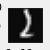

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
prediction : [[ -5.87   2.06   4.35   0.24 -11.17  -3.04  -1.11   1.84  -8.1   -9.56]]


In [15]:
image_of_two=X[1015]
display_digit(image_of_two)

prediction=model.predict(image_of_two.reshape(1,400))

print(f"prediction : {prediction}")
#print(f"largest prediction: {np.argmax(prediction)}")


In [ ]:
prediction_p = tf.nn.softmax(prediction)

print(f" predicting a Two. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}")

 predicting a Two. Probability vector: 
[[2.21e-09 6.99e-02 9.03e-01 2.44e-02 5.13e-08 1.32e-07 1.20e-06 2.37e-03
  1.69e-05 1.86e-08]]
Total of predictions: 1.000


To return an integer representing the predicted target, you want the index of the largest probability. This is accomplished with the Numpy [argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) function.

In [ ]:
yhat=np.argmax(prediction)
print(f"y hat : {yhat}" )

y hat : 2


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━

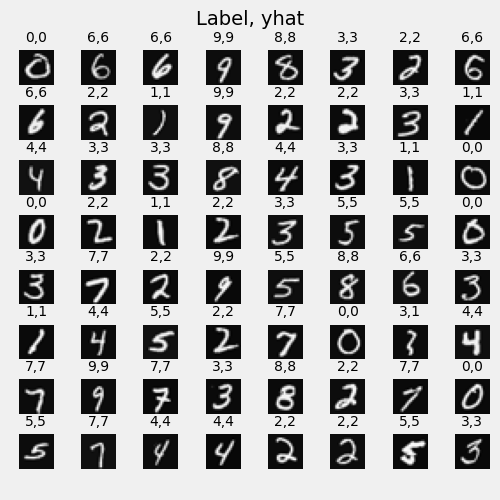

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(5,5))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91]) #[left, bottom, right, top]
widgvis(fig)
for i,ax in enumerate(axes.flat):
    # Select random indices
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and
    # reshape the image
    X_random_reshaped = X[random_index].reshape((20,20)).T
    
    # Display the image
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Predict using the Neural Network
    prediction = model.predict(X[random_index].reshape(1,400))
    prediction_p = tf.nn.softmax(prediction)
    yhat = np.argmax(prediction_p)
    
    # Display the label above the image
    ax.set_title(f"{y[random_index,0]},{yhat}",fontsize=10)
    ax.set_axis_off()
fig.suptitle("Label, yhat", fontsize=14)
plt.show()


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 612us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
42 errors out of 5000 images


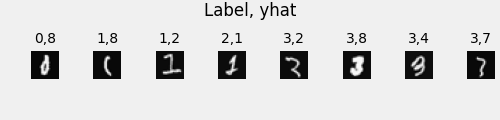

In [ ]:
print( f"{display_errors(model,X,y)} errors out of {len(X)} images")


In [17]:
hf=open(r"maria.txt","r")
print(hf.read(20))

im maria im 20 years
